In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [3]:
import pandas as pd

In [ ]:
fake_news = pd.read_csv("Fake.csv")
true_news = pd.read_csv("True.csv")

In [ ]:
fake_news['label'] = 'fake'
true_news['label'] = 'real'

In [ ]:
data = pd.concat([fake_news, true_news], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.drop('subject', axis=1)

In [ ]:
data['news'] = data['title'] + ' ' + data['text']

In [ ]:
#creates a new column and makes the title and text into lower case
data["title"] = data["title"].str.lower()
data["text"] = data["text"].str.lower()

#removes any urls that might be in the title or text
data["title"] = data["title"].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
data["text"] = data["text"].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

#splits up the text into an individual words in the list
data["title"] = data["title"].apply(word_tokenize)
data["text"] = data["text"].apply(word_tokenize)

In [ ]:
data

In [ ]:
# Contraction Splitting - Done
# Stemming - Done
# Lemmatization - Not needed
# Stop Word Removal - done

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import re
# Initialize the stopwords
stoplist = stopwords.words('english')

vocab_size = 10000
corpus = []
ps = PorterStemmer() ## used for standardization of words

for i in range(0,len(data)):
    message = re.sub('[^a-zA-Z]',' ',data['news'][i]) ## except a-z and A-Z all charectors will be replaced by space
    message = message.lower() ## then make every words in lower
    message = message.split() ## then split every words in list
    
    message = [ps.stem(word) for word in message if not word in stoplist] ## use stem to stem words which are not in stoplist
    message = ' '.join(message) ## then join those words to make the full sentence as a list 
    corpus.append(message) ## then append all the sentences in the corpus

In [ ]:
len(corpus)

In [ ]:
for i in range(0,len(corpus)):
    data['clean_news'] = corpus

In [ ]:
data

In [ ]:
import contractions

for i in range(0, len(data['clean_news'])):
    text = data['clean_news'][i]
    expanded_words = []   
    for word in text.split():
        # using contractions.fix to expand the shortened words
        expanded_words.append(contractions.fix(word))
    data['clean_news'][i] = expanded_words


In [ ]:
data.to_csv('clean_data.csv')

In [ ]:
len(data)

In [ ]:
data2 = data.drop(['title', 'text', 'news'], axis = 1)

In [ ]:
data2
data2.to_csv('clean_data2.csv')

In [2]:
import pandas as pd
df = pd.read_csv("clean_data.csv")
df_true_news = df[df["label"]== "real"]
df_fake_news = df[df["label"] == "fake"]

<function matplotlib.pyplot.show(*args, **kw)>

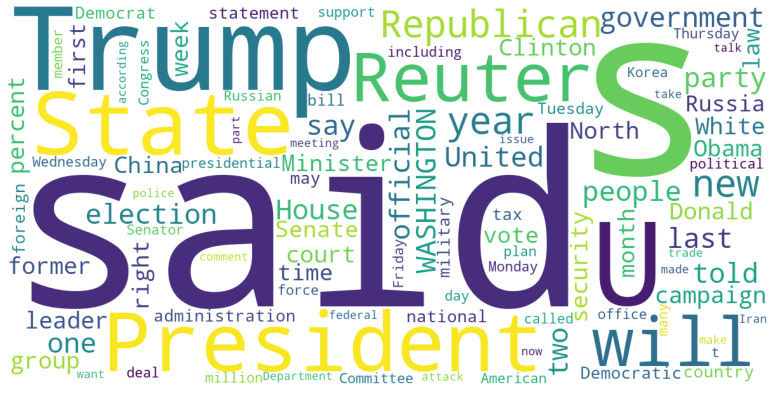

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud,STOPWORDS
text = " ".join(i for i in df_true_news.news)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 100,
               scale = 1, collocations = False, repeat = True, min_font_size = 5)

wc.generate(text)

plt.style.use('seaborn-pastel')
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

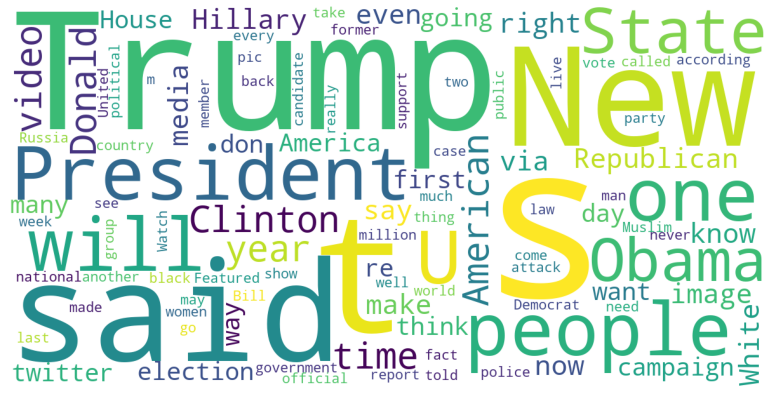

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud,STOPWORDS
text = " ".join(i for i in df_fake_news.news)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 100,
               scale = 1, collocations = False, repeat = True, min_font_size = 5)

wc.generate(text)

plt.style.use('seaborn-pastel')
plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show